In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from matplotlib import style
style.use("ggplot")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Cross Validation
<b>Cross Validation</b> was embeded in Scikit named <b><em>cross_val_score</em></b> in the <b>model_selection</b> module.<br>

<p><center>default folds = 3</center>
<center>$$\Large \Downarrow$$</center>
<center>Change the cv parameter (folds)</center>
<center>$$\Large \Downarrow$$</center>
<center>Compute Results Mean</center>
</p>

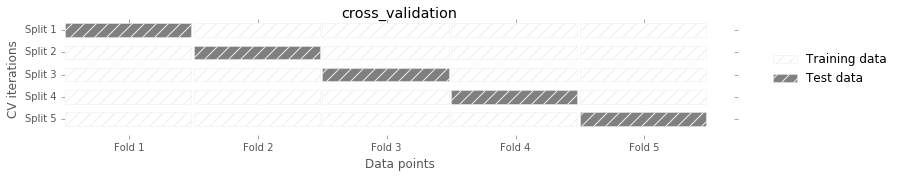

In [2]:
mglearn.plots.plot_cross_validation()

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print "Cross_validation scores: {}".format(scores)

Cross_validation scores: [ 0.96078431  0.92156863  0.95833333]


#### Benefits of Cross-Validation

+ Advantages
    + Decrease the influence of randomness (lucky or unlucky)
    + Show the model sensitiy for datasets
    + Use data more effectively
<br><br>   
+ Disadvantages 
    + Computation cost

#### Refined version of k-fold Cross-validation: Stratified k-Fold Cross-Validation and Other Strategies

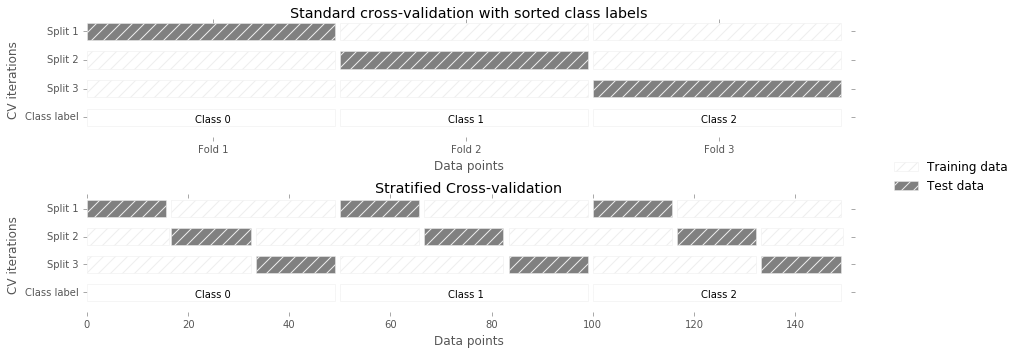

In [4]:
mglearn.plots.plot_stratified_cross_validation()

#### Non-stratified 5 folds and 3 folds

In [6]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)
print "Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv = kfold))

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [7]:
kfold = KFold(n_splits=3)
print "Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold))

Cross-validation scores:
[ 0.  0.  0.]


Really bad idea.
<hr/>
<strong>We need to stratify it.</strong>

In [12]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 5, shuffle = False, random_state = 42)
print "Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv = kfold))

Cross-validation scores:
[ 1.          0.96666667  0.93333333  0.9         1.        ]


#### Leave-One-out Cross-validation
#### Shue-split cross-validation
#### Cross-validation with groups
<hr/>

### Grid search

#### Analyzing the result of cross-validation

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
grid_search.fit(X_train, y_train)
results = pd.DataFrame(grid_search.cv_results_)

display(results.head())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0056,0.0006,0.366071,0.366079,0.001,0.001,"{u'C': 0.001, u'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.005713,0.00049,0.011371,0.002852
1,0.0026,0.0008,0.366071,0.366079,0.001,0.01,"{u'C': 0.001, u'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000490,0.00040,0.011371,0.002852
2,0.0032,0.0006,0.366071,0.366079,0.001,0.1,"{u'C': 0.001, u'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000748,0.00049,0.011371,0.002852
3,0.0024,0.0010,0.366071,0.366079,0.001,1,"{u'C': 0.001, u'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000490,0.00000,0.011371,0.002852
4,0.0028,0.0008,0.366071,0.366079,0.001,10,"{u'C': 0.001, u'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000400,0.00040,0.011371,0.002852


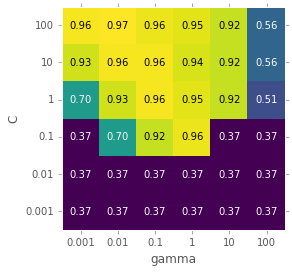

In [18]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

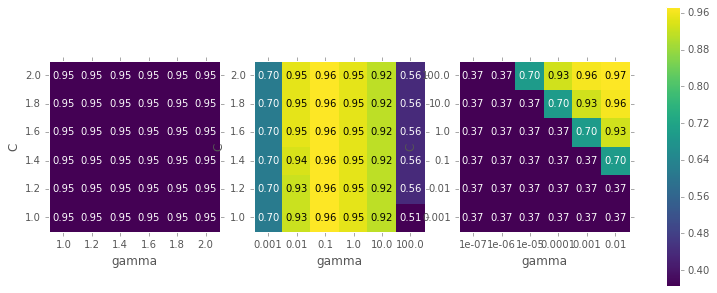

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
# plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
                                            scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                                            yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

### Keep the end goal in mind
+ <b> Business metric</b>
+ <b> Business impact</b>

Type I Error: false positive
<br>
Type II Error: false negative

Binary classification: ROC and AUC curves<br>
Multiclass classification: Confusion matrix